#### Anisha Jani

### PLAY TENNIS- RANDOM FORREST

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
df=pd.read_csv("Play_Tennis.csv")
df

,Day,Outlook,Temp,Humidity,Wind,Play Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
df.isnull().sum()

Day            0
Outlook        0
Temp           0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

### Preprocessing the data using Label Encoding

In [4]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                    
df=df.apply(string_to_int.fit_transform)
df

,Day,Outlook,Temp,Humidity,Wind,Play Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


### Choose the target variables 

In [5]:
feature_cols = ['Outlook','Temp','Humidity','Wind']
X = df[feature_cols ]                             
y = df['Play Tennis']

### Split the data into training and testing data

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)


### Create a Random Forest Classifier model

In [23]:
clf=RandomForestClassifier(n_estimators=50,random_state=47,max_depth=7)

### Fit the training data

In [24]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=47)

In [25]:
pred_train=clf.predict(x_train)
pred_test=clf.predict(x_test)

### Find out the training and testing accuracy

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'train_acc:{accuracy_score(pred_train,y_train)}')
print(f'test_acc:{accuracy_score(pred_test,y_test)}')

train_acc:1.0
test_acc:0.6666666666666666


Train set:


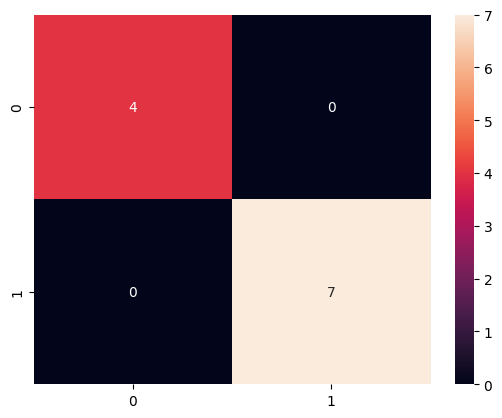

Test set:


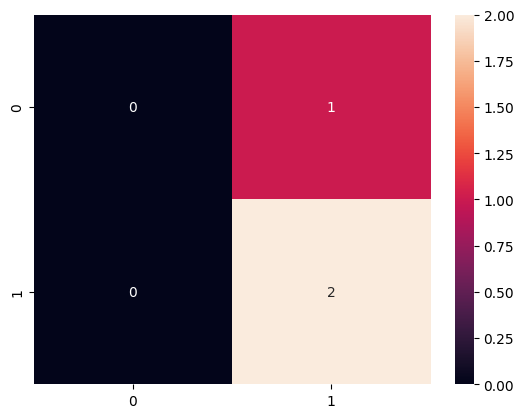

In [27]:
print('Train set:')
sns.heatmap(confusion_matrix(y_train,pred_train),annot=True,fmt='.3g')
plt.show()
print('Test set:')
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True)
plt.show()

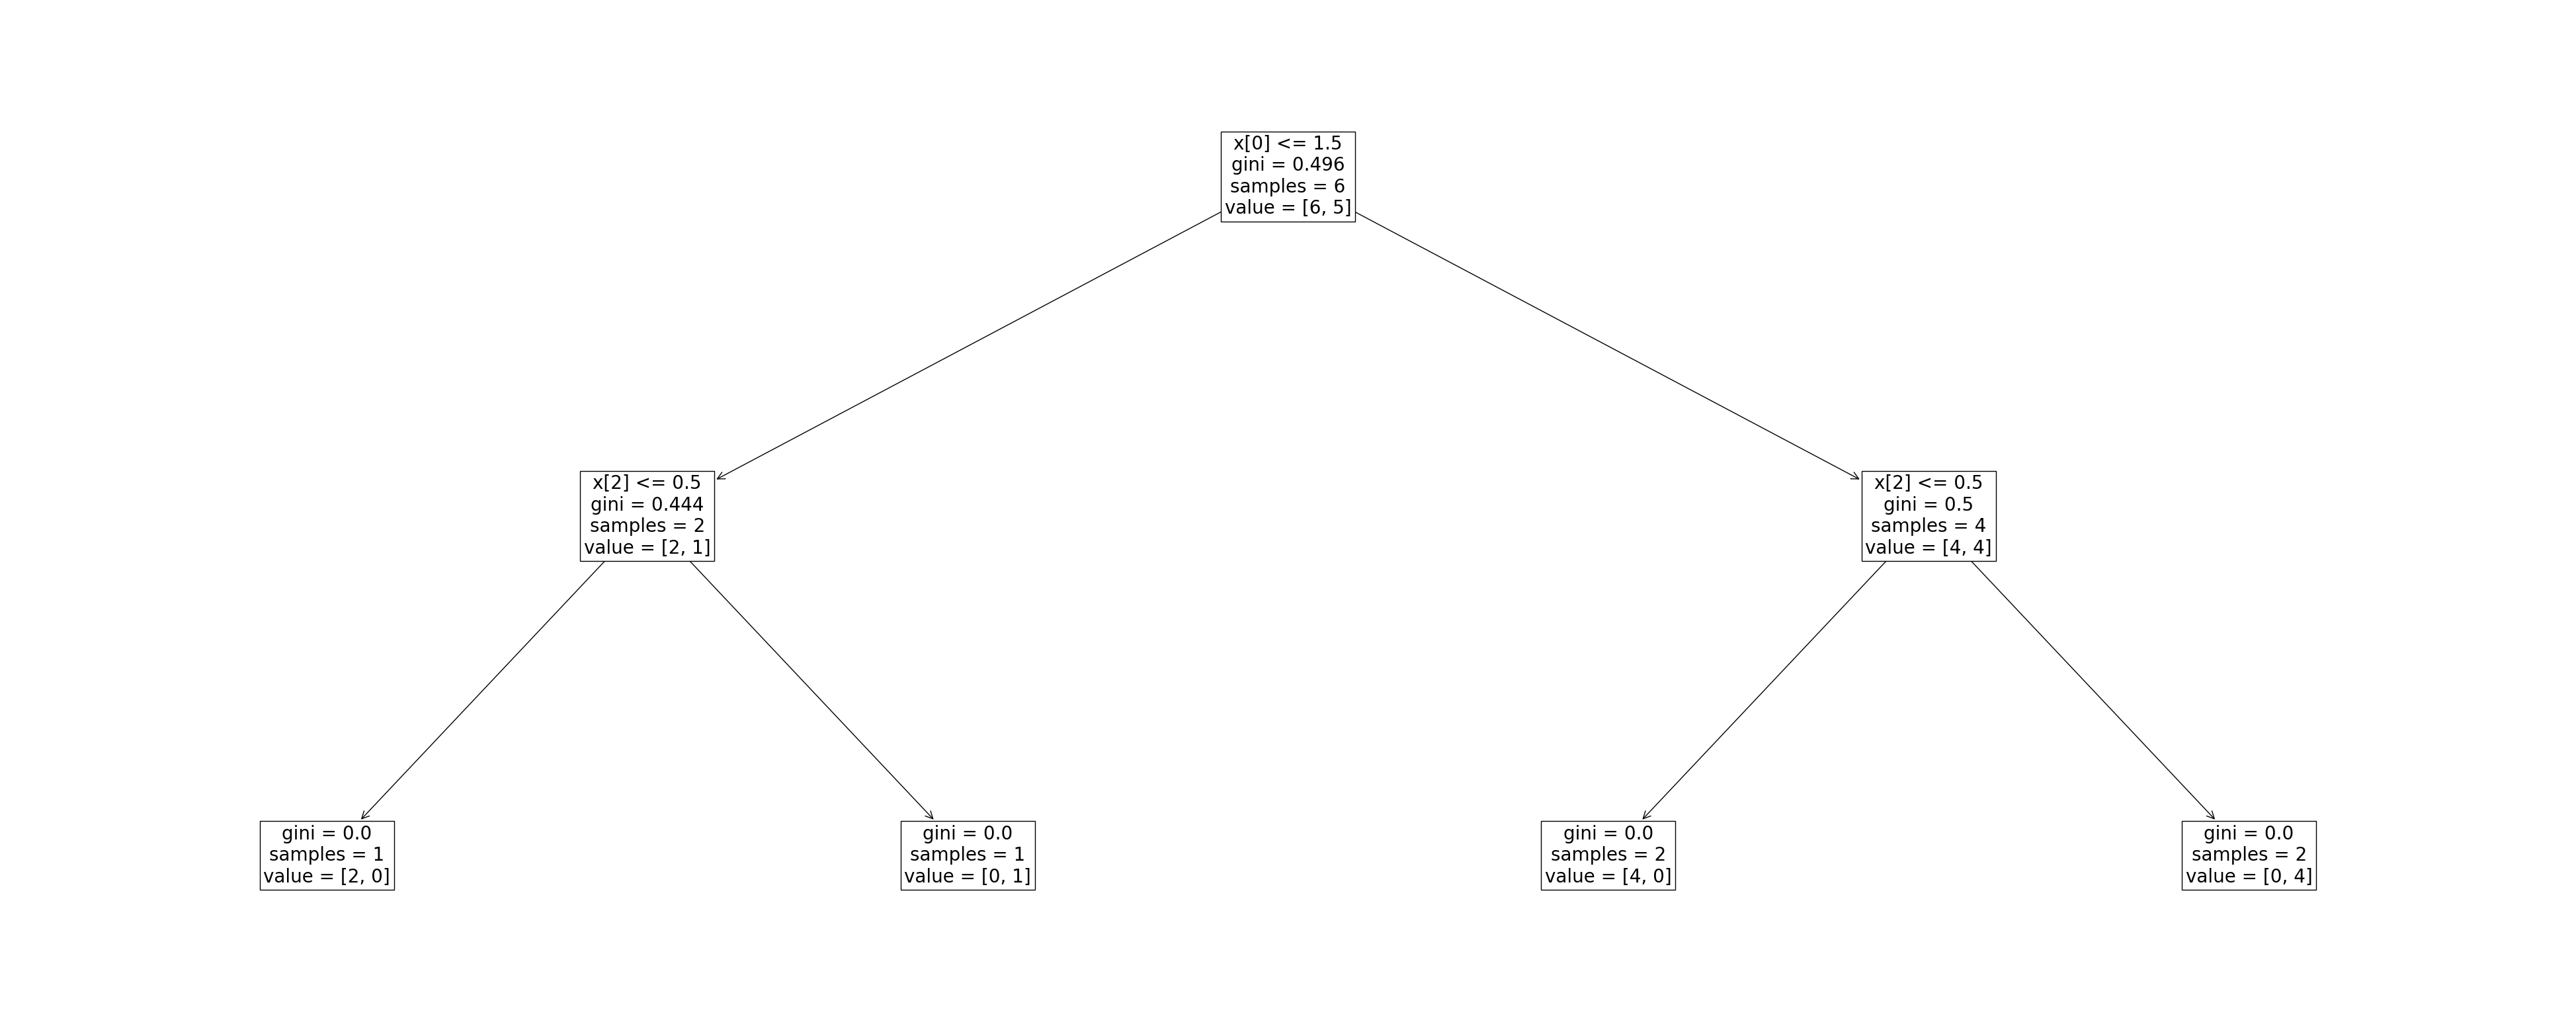

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(clf.estimators_[0],fontsize=20)

plt.show()